
- [Prepare environment](#Prepare environment)
  - [Model Prediction1 - classification: wine_type](## Model Prediction1 - classification: wine_type)
    - [Preparation for modeling](### Preparation for modeling1)
    - [Comparison algorithms](### Comparison algorithms1)
    - [Training and evaluation of classification models](### Training and evaluation of classification models : wine_type for red wine dataset)
  - [ Model Prediction2](## Model Prediction2 - classification: wine_quality)
    - [Preparation for modeling](### Preparation for modeling2)
    - [Comparison algorithms](### Comparison algorithms2)
    - [Training and evaluation of classification models](### Training and evaluation of classification models : wine_quality for red wine dataset using pipeline)

# Prepare environment

In [1]:
# ============ packages
# basic
import pandas as pd 
import numpy as np

# visualization 
import matplotlib.pyplot as plt
import seaborn as sns

# modeling
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# classification/regression algorithms
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm

# evaluation 
#import model_evaluation_utils as meu
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score 
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score

In [2]:
# Load dataset
path_source = '../data/wines_features.csv'
wines_encoded = pd.read_csv(path_source, sep=",", index_col=[0])
print(wines_encoded.info())
wines_encoded.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 6496
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         6497 non-null   float64
 1   volatile_acidity      6497 non-null   float64
 2   citric_acid           6497 non-null   float64
 3   residual_sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free_sulfur_dioxide   6497 non-null   float64
 6   total_sulfur_dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   ph                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  wine_type             6497 non-null   object 
 13  wine_quality          6497 non-null   object 
 14  wine_quality_encoded  6497 non-null   float64
 15  x0_red               

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,wine_quality,wine_quality_encoded,x0_red,x0_white
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high,2.0,0.0,1.0
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low,0.0,1.0,0.0
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium,1.0,0.0,1.0
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium,1.0,0.0,1.0
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium,1.0,0.0,1.0


In [3]:
# convert datatype
wines_encoded['wine_quality'] = pd.Categorical(wines_encoded['wine_quality'], categories=['low', 'medium', 'high'])
wines_encoded['wine_type'] = pd.Categorical(wines_encoded['wine_type'], categories=['red','white'])
wines_encoded.dtypes

fixed_acidity            float64
volatile_acidity         float64
citric_acid              float64
residual_sugar           float64
chlorides                float64
free_sulfur_dioxide      float64
total_sulfur_dioxide     float64
density                  float64
ph                       float64
sulphates                float64
alcohol                  float64
quality                    int64
wine_type               category
wine_quality            category
wine_quality_encoded     float64
x0_red                   float64
x0_white                 float64
dtype: object

# Model training and evaluation
- should we normalize/standardize raw data before spliting train/test dataset?

    : check the distribution of features 
    
    : check the strength/weakness of machine learning algorithms 

- ref: https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/



## Model Prediction1 - classification: wine_type

### Preparation for modeling1

In [4]:
# Split data (train/test) 
wines_features = wines_encoded.drop(columns=['quality','wine_quality', 'wine_quality_encoded','wine_type','x0_red','x0_white'])
wines_feature_names = wines_features.columns

wines_type_labels = np.array(wines_encoded['wine_type'])
wines_quality_labels = np.array(wines_encoded['wine_quality'])

In [5]:
wines_features.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2
1,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9


In [6]:
# define IV & DV
X = wines_features
y_wine_type = wines_encoded['wine_type']

# split dataset for predicting wine quality
wt_train_x, wt_test_x, wt_train_y, wt_test_y = train_test_split(X, y_wine_type, test_size=0.3, random_state=42)
print(Counter(wt_train_y), Counter(wt_test_y))
print('Features:', list(wines_feature_names))

# standardizae DV(numeric features) using scaler
X = np.array(X)
scaler = StandardScaler()

wt_train_x_scaled = scaler.fit_transform(wt_train_x)
wt_test_x_scaled = scaler.transform(wt_test_x)

Counter({'white': 3418, 'red': 1129}) Counter({'white': 1480, 'red': 470})
Features: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol']


### Comparison algorithms1

In [7]:
# ====== Function (START) : evaluate each model in turn


def compare_models(str_model_dv,X, Y):
    # prepare configuration for cross validation test harness
    seed = 10
    # prepare models
    models = []
    models.append(('LR', LogisticRegression()))
    models.append(('CART', DecisionTreeClassifier()))
    models.append(('RF', RandomForestClassifier()))
    models.append(('KNN', KNeighborsClassifier(n_neighbors=10)))
    models.append(('SVM', SVC()))
    models.append(('NB', GaussianNB()))
    models.append(('LDA', LinearDiscriminantAnalysis()))

    # evaluate each model in turn
    results = []
    names = []
    scoring = 'accuracy'
    results_acc = []

    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=42, shuffle=True)
        cv_results = model_selection.cross_val_score(
                                                    model, X, Y, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        results_acc.append(str(msg))
        
    model_type = str(str_model_dv)
    return model_type, results_acc, names, results
 # ====== Function (END)

In [8]:
# ====== Function (START): boxplot algorithm comparison


def plot_compare_model_acc(x):
    fig = plt.figure(figsize=(10, 6))
    model_type = x[0]
    names = x[2]
    results = x[3]

    fig.suptitle('Algorithm Comparison:'+model_type)
    ax = fig.add_subplot(111)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    return plt.show()

    
# ====== Function (END)

In [9]:
# compare algorithms - wine_type
wine_type_prediction = compare_models('wine_type',wt_train_x_scaled,wt_train_y)

  Algorithms   Mean Accuracy (std)
0         LR   0.992963 (0.004265)
1       CART   0.983727 (0.004192)
2         RF   0.994064 (0.003413)
3        KNN   0.993182 (0.003990)
4        SVM   0.996041 (0.003519)
5         NB   0.974047 (0.005557)
6        LDA   0.995381 (0.004110)


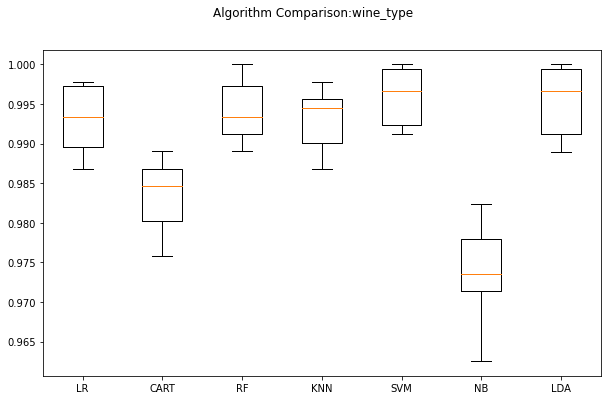

<Figure size 432x288 with 0 Axes>

In [10]:
# plot results
my_res = wine_type_prediction[1]
df = pd.DataFrame([item.split(":") for item in my_res])
df.columns = ['Algorithms','Mean Accuracy (std)']
print(df)

plot_compare_model_acc(wine_type_prediction)

# save plot
plt.savefig("../output/compare_models_wt.png")

### Training and evaluation of classification models : wine_type for red wine dataset

In [11]:
# Random Forest model

#Train the random forests model
random_forest = RandomForestClassifier()
random_forest.fit(wt_train_x_scaled, wt_train_y)
wtp_rf_predictions = random_forest.predict(wt_test_x_scaled)

#Measure the performance of the random forest model
print(classification_report(wt_test_y, wtp_rf_predictions, target_names=['red', 'white']))
print(confusion_matrix(wt_test_y, wtp_rf_predictions))

              precision    recall  f1-score   support

         red       1.00      0.98      0.99       470
       white       0.99      1.00      1.00      1480

    accuracy                           0.99      1950
   macro avg       1.00      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950

[[ 460   10]
 [   1 1479]]


In [12]:
# Linear Discriminant Analysis

#Train the LDA model
LDA_model = LinearDiscriminantAnalysis()
LDA_model.fit(wt_train_x_scaled, wt_train_y)
wtp_LDA_predictions = LDA_model.predict(wt_test_x_scaled)

#Measure the performance of the random forest model
print(classification_report(wt_test_y, wtp_LDA_predictions, target_names=['red', 'white']))
print(confusion_matrix(wt_test_y, wtp_LDA_predictions))

              precision    recall  f1-score   support

         red       0.99      0.99      0.99       470
       white       1.00      1.00      1.00      1480

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950

[[ 463    7]
 [   7 1473]]


In [13]:
# =======select the best model based on kappa score
print('kappa score of random forest model',cohen_kappa_score(wtp_rf_predictions, wt_test_y))
print('kappa score of LDA model',cohen_kappa_score(wtp_LDA_predictions, wt_test_y))

kappa score of random forest model 0.9844802512101063
kappa score of LDA model 0.9803766532489937


## Model Prediction2 - classification: wine_quality

### Preparation for modeling2

In [14]:
# define IV & DV
X = wines_features
y_wine_quality = wines_encoded['wine_quality']


# split dataset for predicting wine quality
wq_train_x, wq_test_x, wq_train_y, wq_test_y = train_test_split(X, y_wine_quality, test_size=0.3, random_state=42)
print(Counter(wq_train_y), Counter(wq_test_y))
print('Features:', list(wines_feature_names))

# standardizae DV(numeric features) using scaler
X = np.array(X)
scaler = StandardScaler()

wq_train_x_scaled = scaler.fit_transform(wq_train_x)
wq_test_x_scaled = scaler.transform(wq_test_x)


Counter({'medium': 2737, 'low': 1666, 'high': 144}) Counter({'medium': 1178, 'low': 718, 'high': 54})
Features: ['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar', 'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density', 'ph', 'sulphates', 'alcohol']


### Comparison algorithms2

In [15]:
# compare algorithms - wine_quality
wine_quality_prediction = compare_models('wine_quality',wq_train_x_scaled,wq_train_y)

  Algorithms   Mean Accuracy (std)
0         LR   0.706839 (0.023898)
1       CART   0.726408 (0.016562)
2         RF   0.799427 (0.020755)
3        KNN   0.718051 (0.019360)
4        SVM   0.737843 (0.024084)
5         NB   0.643511 (0.021331)
6        LDA   0.707277 (0.023434)


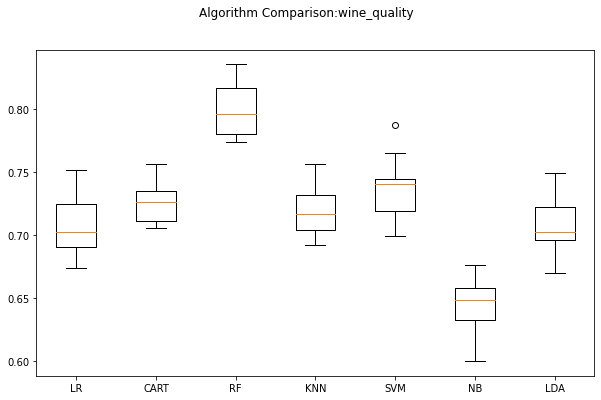

<Figure size 432x288 with 0 Axes>

In [16]:
# plot results
my_res = wine_quality_prediction[1]
df = pd.DataFrame([item.split(":") for item in my_res])
df.columns = ['Algorithms','Mean Accuracy (std)']
print(df)

plot_compare_model_acc(wine_quality_prediction)

# save plot
plt.savefig("../output/compare_models_wq.png")

### Training and evaluation of classificatio models : wine_quality for red wine dataset using pipeline

In [17]:
# subset data
wine_red = wines_encoded[wines_encoded.wine_type == 'red']
wine_red.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,wine_quality,wine_quality_encoded,x0_red,x0_white
1,7.7,0.640,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5,red,low,0.0,1.0,0.0
5,7.2,0.530,0.14,2.1,0.064,15.0,29.0,0.99323,3.35,0.61,12.1,6,red,medium,1.0,1.0,0.0
8,9.0,0.440,0.49,2.4,0.078,26.0,121.0,0.99780,3.23,0.58,9.2,5,red,low,0.0,1.0,0.0
13,8.1,0.725,0.22,2.2,0.072,11.0,41.0,0.99670,3.36,0.55,9.1,5,red,low,0.0,1.0,0.0
14,5.2,0.480,0.04,1.6,0.054,19.0,106.0,0.99270,3.54,0.62,12.2,7,red,medium,1.0,1.0,0.0


In [18]:
# Split data (train/test) 
r_wines_features = wine_red.drop(columns=['quality','wine_quality', 'wine_quality_encoded','wine_type','x0_red','x0_white'])
r_wines_feature_names = r_wines_features.columns

r_wines_type_labels = np.array(wine_red['wine_type'])
r_wines_quality_labels = np.array(wine_red['wine_quality'])

# define IV & DV
X = r_wines_features
r_y_wine_quality = wine_red['wine_quality']

# split dataset for predicting wine quality
r_wq_train_x, r_wq_test_x, r_wq_train_y, r_wq_test_y = train_test_split(X, r_y_wine_quality, test_size=0.3, random_state=42)

In [19]:
# red wine quality prediction - using pipeline
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)), 
                     ('lr_classifier',LogisticRegression())])
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])
pipeline_randomforest = Pipeline([('scalar3', StandardScaler()),
                      ('pca3', PCA(n_components=2)),
                      ('rf_classifier', RandomForestClassifier())])
pipeline_knn=Pipeline([('scalar4',StandardScaler()),
                     ('pca4',PCA(n_components=2)),
                     ('knn_classifier',KNeighborsClassifier())])

pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest, pipeline_knn]
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Support Vector Machine',3:'K Nearest Neighbor'}

for pipe in pipelines:
  pipe.fit(r_wq_train_x, r_wq_train_y)
for i,model in enumerate(pipelines):
    print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(r_wq_test_x,r_wq_test_y)))

Logistic Regression Test Accuracy:0.6645833333333333
Decision Tree Test Accuracy:0.6583333333333333
Support Vector Machine Test Accuracy:0.6833333333333333
K Nearest Neighbor Test Accuracy:0.6020833333333333


### Training and evaluation of classificatio models : wine_quality for white wine dataset using pipeline

In [20]:
# subset data
wine_white = wines_encoded[wines_encoded.wine_type == 'white']
wine_white.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality,wine_type,wine_quality,wine_quality_encoded,x0_red,x0_white
0,7.0,0.17,0.74,12.8,0.045,24.0,126.0,0.99420,3.26,0.38,12.2,8,white,high,2.0,0.0,1.0
2,6.8,0.39,0.34,7.4,0.020,38.0,133.0,0.99212,3.18,0.44,12.0,7,white,medium,1.0,0.0,1.0
3,6.3,0.28,0.47,11.2,0.040,61.0,183.0,0.99592,3.12,0.51,9.5,6,white,medium,1.0,0.0,1.0
4,7.4,0.35,0.20,13.9,0.054,63.0,229.0,0.99888,3.11,0.50,8.9,6,white,medium,1.0,0.0,1.0
6,7.5,0.27,0.31,17.7,0.051,33.0,173.0,0.99900,3.09,0.64,10.2,5,white,low,0.0,0.0,1.0


In [21]:
# Split data (train/test) 
w_wines_features = wine_white.drop(columns=['quality','wine_quality', 'wine_quality_encoded','wine_type','x0_red','x0_white'])
w_wines_feature_names = w_wines_features.columns

w_wines_type_labels = np.array(wine_white['wine_type'])
w_wines_quality_labels = np.array(wine_white['wine_quality'])

# define IV & DV
X = w_wines_features
w_y_wine_quality = wine_white['wine_quality']

# split dataset for predicting wine quality
w_wq_train_x, w_wq_test_x, w_wq_train_y, w_wq_test_y = train_test_split(X, w_y_wine_quality, test_size=0.3, random_state=42)

In [22]:
# white wine quality prediction - using pipeline
pipeline_lr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=2)), 
                     ('lr_classifier',LogisticRegression())])
pipeline_dt=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_classifier',DecisionTreeClassifier())])
pipeline_randomforest = Pipeline([('scalar3', StandardScaler()),
                      ('pca3', PCA(n_components=2)),
                      ('rf_classifier', RandomForestClassifier())])
pipeline_knn=Pipeline([('scalar4',StandardScaler()),
                     ('pca4',PCA(n_components=2)),
                     ('knn_classifier',KNeighborsClassifier())])

pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest, pipeline_knn]
pipe_dict = {0: 'Logistic Regression', 1: 'Decision Tree', 2: 'Support Vector Machine',3:'K Nearest Neighbor'}

for pipe in pipelines:
  pipe.fit(w_wq_train_x, w_wq_train_y)
for i,model in enumerate(pipelines):
    print("{} Test Accuracy:{}".format(pipe_dict[i],model.score(w_wq_test_x,w_wq_test_y)))

Logistic Regression Test Accuracy:0.6163265306122448
Decision Tree Test Accuracy:0.6578231292517007
Support Vector Machine Test Accuracy:0.7006802721088435
K Nearest Neighbor Test Accuracy:0.6074829931972789


- How can we extract feature importance (feature names and their coefficient values in each model) when we use pipeline?

    : https://towardsdatascience.com/how-to-get-feature-importances-from-any-sklearn-pipeline-167a19f1214

## Feature Importance from random forest model for predicting the quality of red wine and white wine

alcohol                 0.181618
volatile_acidity        0.118426
sulphates               0.108239
total_sulfur_dioxide    0.094748
density                 0.090045
chlorides               0.075498
ph                      0.075231
fixed_acidity           0.066060
citric_acid             0.065994
free_sulfur_dioxide     0.064650
residual_sugar          0.059490
dtype: float64
No handles with labels found to put in legend.


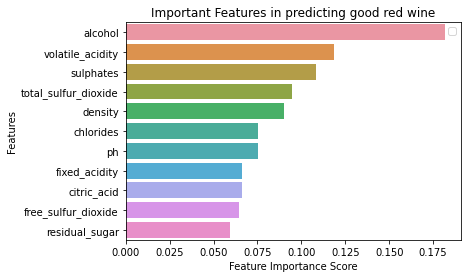

In [23]:
# red wine - random forest - feature importance

# define IV & DV
X =r_wines_features
r_y_wine_quality = wine_red['wine_quality']

# split dataset for predicting wine quality
r_wq_train_x, r_wq_test_x, r_wq_train_y, r_wq_test_y = train_test_split(X, r_y_wine_quality, test_size=0.3, random_state=42)

rf = RandomForestClassifier()
rf.fit(r_wq_train_x, r_wq_train_y)
r_wq_rf_predictions = rf.predict(r_wq_test_x)

r_feature_imp = pd.Series(rf.feature_importances_, index=r_wines_features.columns).sort_values(ascending=False)
print(r_feature_imp)

# Creating a bar plot : feature importance
sns.barplot(x=r_feature_imp, y=r_feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features in predicting good red wine")
plt.legend()
plt.show()

#=========== feature importance
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python

alcohol                 0.131607
volatile_acidity        0.119461
density                 0.102541
free_sulfur_dioxide     0.099173
total_sulfur_dioxide    0.086848
residual_sugar          0.082874
citric_acid             0.081276
chlorides               0.078795
ph                      0.078638
sulphates               0.070940
fixed_acidity           0.067848
dtype: float64
No handles with labels found to put in legend.


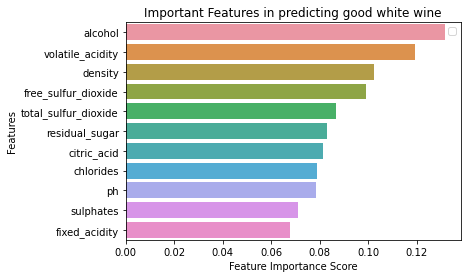

In [24]:
# white wine - random forest - feature importance

# define IV & DV
X = w_wines_features
w_y_wine_quality = wine_white['wine_quality']

# split dataset for predicting wine quality
w_wq_train_x, w_wq_test_x, w_wq_train_y, w_wq_test_y = train_test_split(X, w_y_wine_quality, test_size=0.3, random_state=42)

rf = RandomForestClassifier()
rf.fit(w_wq_train_x, w_wq_train_y)
w_wq_rf_predictions = rf.predict(w_wq_test_x)

w_feature_imp = pd.Series(rf.feature_importances_, index=w_wines_features.columns).sort_values(ascending=False)
print(w_feature_imp)

# Creating a bar plot : feature importance
sns.barplot(x=w_feature_imp, y=w_feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features in predicting good white wine")
plt.legend()
plt.show()

#=========== feature importance
# https://stackoverflow.com/questions/44101458/random-forest-feature-importance-chart-using-python